In [9]:
import torch
import torchvision
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import sys
sys.path.append('../src')  # Add src directory to the system path
from data_loading import get_data_loaders
from model import CIFAR10CNN


## Load Model and Data

In [10]:
# Load the data
trainloader, testloader, classes = get_data_loaders(batch_size=64)

# Initialize the model and load trained weights
model = CIFAR10CNN()
model.load_state_dict(torch.load('../models/cifar10_cnn.pth'))
model.eval()


Files already downloaded and verified
Files already downloaded and verified


CIFAR10CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

## Make Predictions

In [11]:
# Collect true labels and predicted labels
true_labels = []
pred_labels = []

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.numpy())
        pred_labels.extend(predicted.numpy())


In [12]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)


## Visualize the Confusion Matrix

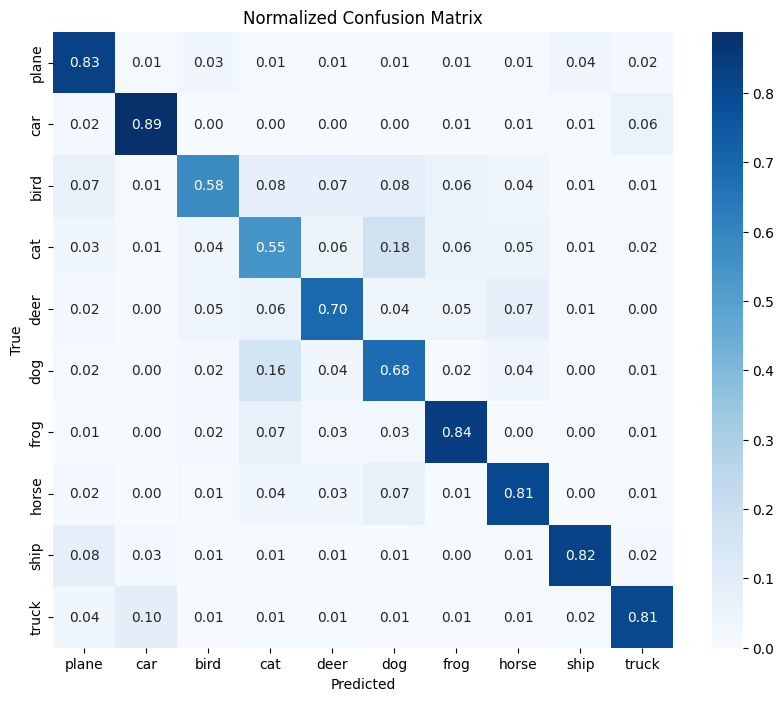

In [13]:
# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()
